# Random Forest Hyperparameter Tuning 

This shows some simple code of how to plot n_estimators to F1 score.

In [1]:
%matplotlib notebook 

import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 

from sklearn.ensemble import RandomForestClassifier 
from sklearn.model_selection import cross_val_score

In [2]:
data = pd.read_csv(r'/home/team/Documents/Data-Oriented-Proposal-Engine/SpendingData/DummiesAllSetAsides.csv')
# data.head()

In [3]:
X = data.drop(["type_of_set_aside_code"],axis=1)
y = data["type_of_set_aside_code"]

In [4]:
# Split the data into test and training data sets

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=42)

# N-Estimators Visualizer
The cell below tests a number of estimators (decision trees) and returns a graph used to determine the appropriate number of trees to use. Each decision tree makes a guess as to what the target is; the purposes of running multiple decision trees is that a Random Forest model will the average resulting in a more accurate prediction. While more decision trees will always result in better predictions, the benefit of additional trees levels out relatively quickly with the trade off of performance. 

<IPython.core.display.Javascript object>


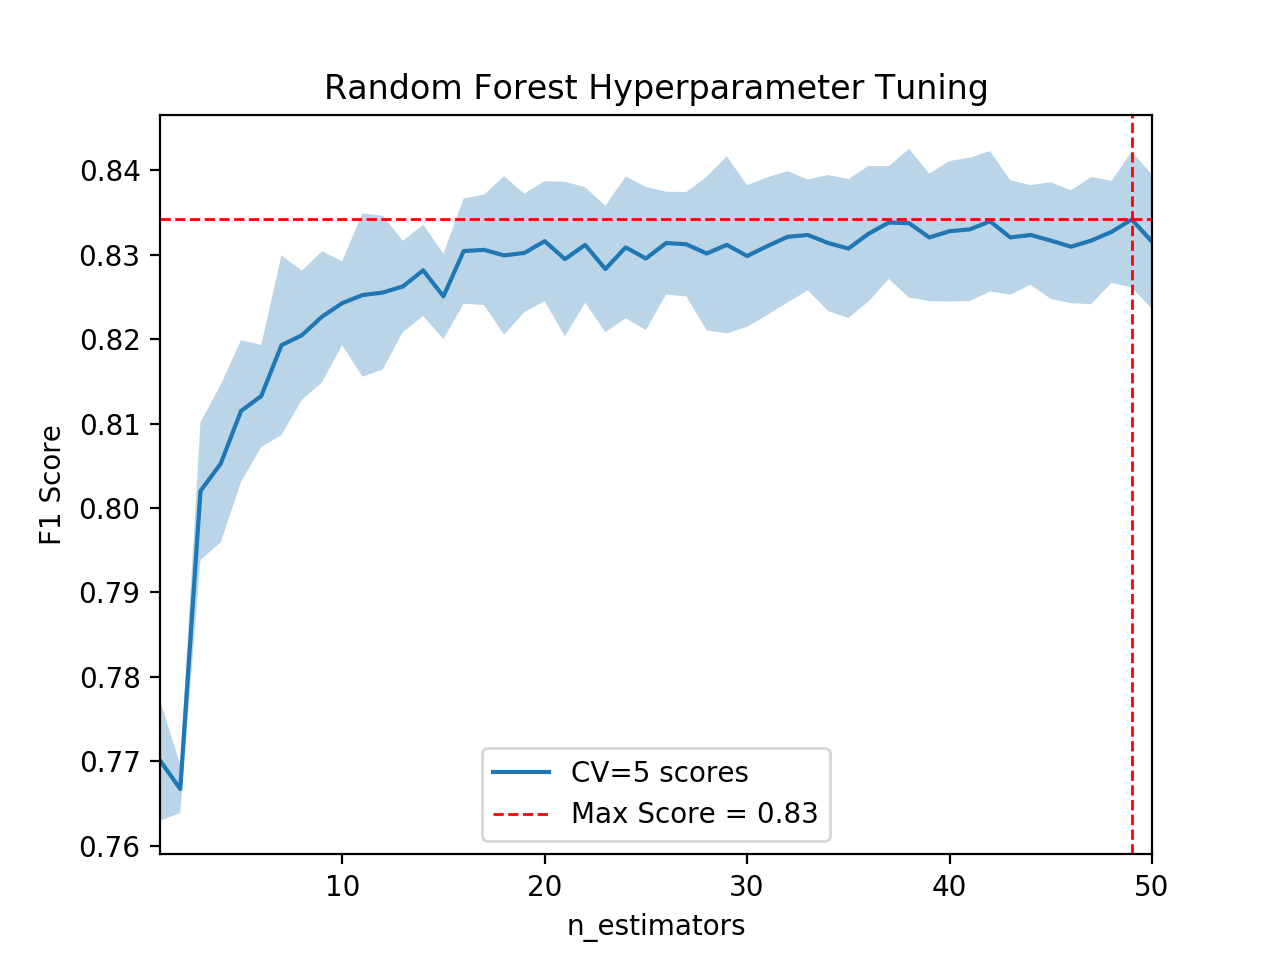

/home/team/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:657: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=5.
  % (min_groups, self.n_splits)), Warning)
/home/team/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:657: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=5.
  % (min_groups, self.n_splits)), Warning)
/home/team/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:657: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=5.
  % (min_groups, self.n_splits)), Warning)
/home/team/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:657: Warning: The least populated class in y has only 1 members, 

/home/team/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:657: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=5.
  % (min_groups, self.n_splits)), Warning)
/home/team/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:657: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=5.
  % (min_groups, self.n_splits)), Warning)
/home/team/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:657: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=5.
  % (min_groups, self.n_splits)), Warning)
/home/team/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:657: Warning: The least populated class in y has only 1 members, 

CPU times: user 7min 39s, sys: 8.99 s, total: 7min 48s
Wall time: 6min 57s


In [5]:
%%time 

def n_estimators_tuning(X_train, y_train, min_estimators=1, max_estimators=50, cv=5, ax=None, save=None):
    
    if ax is None:
        _, ax = plt.subplots()
    
    means = []
    stds = []
    n_estimators = np.arange(min_estimators, max_estimators+1)

    for n in n_estimators:
        model = RandomForestClassifier(n_estimators=n)
        scores = cross_val_score(model, X_train, y_train, cv=cv)
        means.append(scores.mean())
        stds.append(scores.std())
    
    means = np.array(means)
    stds = np.array(stds)
    
    ax.plot(n_estimators, means, label="CV={} scores".format(cv))
    ax.fill_between(n_estimators, means-stds, means+stds, alpha=0.3)
    
    max_score = means.max()
    max_score_idx = np.where(means==max_score)[0]
    ax.axhline(max_score, ls="--", lw=1, c='r')
    ax.axvline(n_estimators[max_score_idx], ls="--", lw=1, c='r', label="Max Score = {:0.2f}".format(max_score))
    
    
    ax.set_xlim(min_estimators, max_estimators)
    ax.set_xlabel("n_estimators")
    ax.set_ylabel("F1 Score")
    ax.set_title("Random Forest Hyperparameter Tuning")
    ax.legend(loc='best')
    
    if save:
        plt.savefig(save)
    
    return ax, scores
    

ax1, score_result = n_estimators_tuning(X_train, y_train)

In [6]:
# Below we create the model with model.fit() 

from sklearn.metrics import classification_report
model = RandomForestClassifier(n_estimators=17)
model.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=17,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [7]:
# And here we return the accuracy. The bottom two lines show what the model is predicting and what the true values are. 

print('Model Accuracy: {:.2%}'.format(model.score(X_test, y_test)))
# print(model.predict(X_test[50:75]))
# print(y_test[50:75])

Model Accuracy: 83.68%


In [8]:
# Next I am testing the accuracy of the model on each specific set aside. Because we have an unbalanced data set
# it seems that the model is great for predicting set asides in general, however it is also skewed to better
# predict certain categories compared to others.

# Create a dictionary object to capture set aside code and it's score
class scores(dict):  
  
    # __init__ function  
    def __init__(self):  
        self = dict()  
          
    # Function to add key:value  
    def add(self, key, value):  
        self[key] = value  

scores = scores()
percent = ''
set_aside_codes = data['type_of_set_aside_code'].unique()

# Loop through each set aside, test it, and append to the dictionary
for set_aside in set_aside_codes:
    dataPoint = data.loc[data['type_of_set_aside_code'] == set_aside]
    XPoint = dataPoint.drop(["type_of_set_aside_code"],axis=1)
    yPoint = dataPoint["type_of_set_aside_code"]
    percent = model.score(XPoint, yPoint)
    percent = round(percent, 4)
    scores.add(set_aside, percent)

In [9]:
# Sort the dictionary by score
import operator
sortedScores = sorted(scores.items(), key=operator.itemgetter(1))

In [10]:
# Print scores
for score in reversed(sortedScores):
    print("{:<8} {:.2%}".format(score[0], score[1]))

NONE     96.67%
SBA      90.18%
SDVOSBC  82.66%
HZC      80.56%
8A       78.81%
SBP      76.19%
WOSB     75.69%
8AN      74.77%
SDVOSBS  71.43%
HZS      50.00%
WOSBSS   33.33%
EDWOSB   14.29%


In [11]:
print(classification_report(y_test, model.predict(X_test), target_names=set_aside_codes))

              precision    recall  f1-score   support

        NONE       0.67      0.59      0.63       613
          8A       0.70      0.51      0.59       593
     SDVOSBC       0.00      0.00      0.00         6
         SBA       0.93      0.67      0.78        63
         8AN       0.00      0.00      0.00         2
        WOSB       0.89      0.93      0.91      7329
         HZC       0.79      0.81      0.80      4140
      EDWOSB       0.56      0.56      0.56         9
         HZS       0.73      0.64      0.68       124
     SDVOSBS       0.00      0.00      0.00         4
         SBP       0.71      0.56      0.63       736
      WOSBSS       0.00      0.00      0.00         4

    accuracy                           0.84     13623
   macro avg       0.50      0.44      0.46     13623
weighted avg       0.83      0.84      0.83     13623



/home/team/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
